In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix,classification_report, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [61]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.dummy import DummyClassifier

In [62]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
import random
import joblib

In [63]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier

In [64]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [65]:
#reading the hotel demand datset downloaded from Kaggle
df = pd.read_csv(r'C:\Users\Prathyusha Diwakarla\Downloads\Bookings\hotel_bookings.csv')

In [66]:
#UNDERSTANDING THE DATA
df.head()
#resulting first five rows in the data set

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [67]:
df.info()
#The data set consists of 32 columns on a whole

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [68]:
df.duplicated().any()
#To check if there are any duplicate values in rows of the data set

True

In [69]:
df.duplicated().sum()
#To result the number of rows which has duplicate values

31994

In [70]:
df.drop_duplicates(inplace=False)

#Using pandas built-in method to drop duplicate rows
#By default, this method returns new DataFrame with duplicate rows removed
#We can set the argument(inplace = true) to remove duplicates from original DataFrame.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [71]:
df.isna()

#Checking if the data set has any missing values
#isna() method is used to find missing values in the data set.
#We can also use isnull() method but it will internally call isna() method and it is an alias of isna() method.
#This method returns TRUE when there is a missing value and FALSE when there is no missing value.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [72]:
df.isna().sum()

#The above command gives an integer value of all the missing values in each column
#There are two ways to handle missing values - Deleting or Imputing the missing values
#Deleting is a bad approach as it may affect other features. 
#Children, Country, Agent and Company are the features which has missing values.

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [73]:
df['children'].mean()

#To replace the missing values in Children column, trying to find mean, median and mode to check which is better.
#mean value is a floating point value but children can never be float
#So not using the mean value to replace missing values.


0.10388990333874994

In [74]:
df['children'].median()

0.0

In [75]:
df['children'].mode()

#Mode and median are same which is 0. To check with which to replace with, using one more method below

0    0.0
dtype: float64

In [76]:
df['children'].value_counts()

#value_counts method returns the most frequent value in that column and the count of it
#respectively for all values in that column. 
#For children 0 is the most frequest value which is mode and median.
#So, replacing the missing values of children with 0

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [77]:
df['children'] = df['children'].fillna(0)


In [78]:
df['country'].value_counts()

#Imputing the missing values in column country with most frequest country.

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
BFA        1
NPL        1
MLI        1
SLE        1
DMA        1
Name: country, Length: 177, dtype: int64

In [79]:
df['country'] = df['country'].fillna(df['country'].value_counts().index[0])


In [80]:
df =df.drop(columns = ['agent', 'company'])

#Company column has more than 90% of missing values, so dropping it as it is not needed
#In the agent column the most frequent value is very less but the actual missing values are much high.
#Imputing with mode will not be optimal and as most of the values are NaN, we can impute 0 or drop the agent column

In [81]:
df.isna().sum()

#Below is the missing values after handling all the columns

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [82]:
df['adr'].unique()

array([  0.  ,  75.  ,  98.  , ..., 266.75, 209.25, 157.71])

In [83]:
df.describe()

#Checking for outliers
#Outlier is  value that lies in an abnormal distance from other values.
#If we observe the mean and min or max values of all columns, adr column has a negative value, and the minimum value is 
#extremely far from mean value, which means the minimum value is an outlier.


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


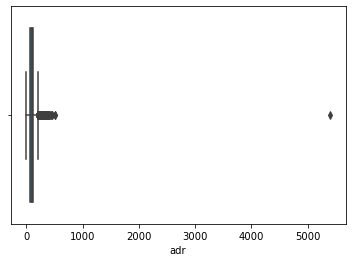

In [84]:
sns.boxplot(x=df['adr'])

#We can visualize outliers using boxplot


In [85]:
df[df['adr'] <0]
#Resulting any value of adr column which has negative values

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [86]:
df = df.drop(df[df.adr < 0].index)
df[df['adr'] < 0]
#Dropping the negative value row and printing to check if there are any more negative values
#We get 0 rows that means no more negative values.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [89]:
df[df['adr']> 5000]

#If we observe the boxplot above, there is only one value above 5000 which is at extreme compared to others

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [90]:
df = df.drop(df[df.adr > 5000].index)
df[df['adr']> 5000]

#Dropping the row with 5000

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [91]:
df[df['adults']+df['babies']+df['children'] == 0].shape

#There are some rows which has adults,babies,children equal to 0.
#No booking cab be made with adult/children 0. So, check if there are any rows of the above kind.
#There are 180 rows of suck kind, Our algorithm will not learn anything from these rows.
#Dropping all the rows which satisfy above conditiondf1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index, inplace = True)


(180, 30)

In [92]:
df.drop(df[df['adults']+df['babies']+df['children'] == 0].index, inplace = False)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [93]:
df['is_canceled'].value_counts()


0    75165
1    44223
Name: is_canceled, dtype: int64

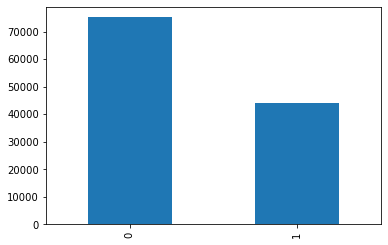

In [94]:
df['is_canceled'].value_counts().plot(kind = 'bar')

#If we look at the bar plot of target variable there is approximately 2:1 ratio between majority and minority class.

In [95]:

#When the data is imbalanced there is a chance that the model will be biased towards majority class.
#Synthetic Minority Oversampling Technique or SMOTE is another technique to oversample the minority class. 
#Simply adding duplicate records of minority class often don’t add any new information to the model. 
#In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into 
#minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is 
#created randomly in feature space.
#We still haven't balanced the data set as SMOTE tends to create a large no. of noisy data points in feature space.df1['total_people'] = df1['adults'] + df1['babies'] + df1['children']   




In [96]:
df['total_people'] = df['adults'] + df['babies'] + df['children']
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

#Adding two new columns
#Combining adults, babies,children into total_people 
#Similarly added total_stay column

Text(0.5, 1.0, 'Pie Chart for Most Preffered  Hotel')

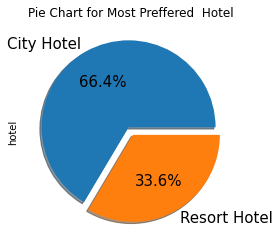

In [97]:
#Data Visualization

df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%',shadow=True,  figsize=(6,4),fontsize=15)   
plt.title('Pie Chart for Most Preffered  Hotel')

#Pie chart to visualize the ratio between Resort hotel and City hotel 

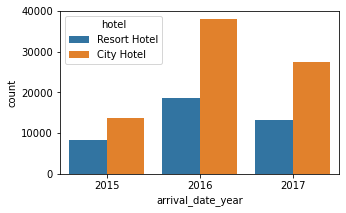

In [98]:
plt.subplots(figsize=(5, 3))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df);

#The percetage of booking each year?
#More than double bookings were made in the year 2016 than previous year 

Text(0, 0.5, 'Number of bookings')

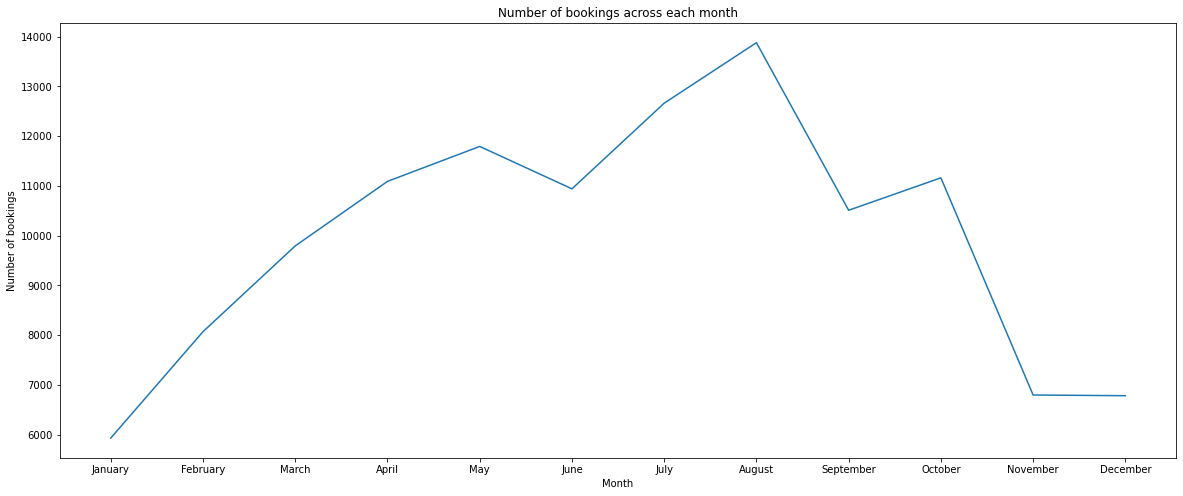

In [99]:
#In which month most bookings happened?

# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# creating df which will map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df

plt.figure(figsize=(20,8))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])

# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month')
#set y label
plt.ylabel('Number of bookings')

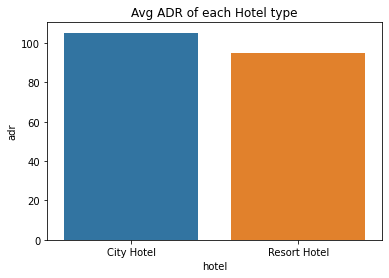

In [100]:
#BIVARIATE AND MULTIVARIATE ANALYSIS

#Which hotel type has the highest ADR

#grouping by hotel adr
grup_by_hotel=df.groupby('hotel')

highest_adr=grup_by_hotel['adr'].mean().reset_index()

#set plot size
plt.figure(figsize=(6,4))

# set labels
plt.xlabel('Hotel type')
plt.ylabel('ADR')
plt.title("Avg ADR of each Hotel type")

#plot the graph
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])

#City Hotel has the highest ADR that means city hotels are generating more revenue than resort hotels

Text(0.5, 1.0, 'Percentage of booking cancellation')

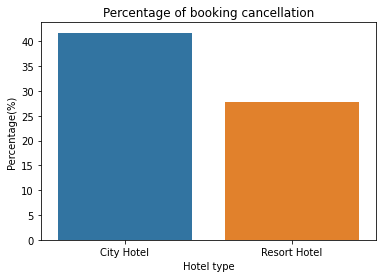

In [101]:
#Which hotel has the highest cancellation rate


# booking canceled=1 
# booking not canceled= 0

# creating new DataFrame where bookings are cancelled.
canceled_df=df[df['is_canceled']==1]

# Grouping by hotel
canceled_df=canceled_df.groupby('hotel').size().reset_index().rename(columns={0: "no_of_cancelled_bookings"})

# adding 'total booking column for calculating the percentage.
canceled_df['total_booikngs']=df.groupby('hotel').size().reset_index().rename(columns={0:"total_bookings"}).drop('hotel',axis=1)
canceled_df

#plotting the barchat
plt.figure(figsize=(6,4))
sns.barplot(x=canceled_df['hotel'],y=canceled_df['no_of_cancelled_bookings']*100/canceled_df['total_booikngs'])

#set labels
plt.xlabel('Hotel type')
plt.ylabel('Percentage(%)')
plt.title("Percentage of booking cancellation")

#Percentage of booking cancellation is high in City hotel

Text(0.5, 1.0, 'Cancellation Rate Vs Distribution channel')

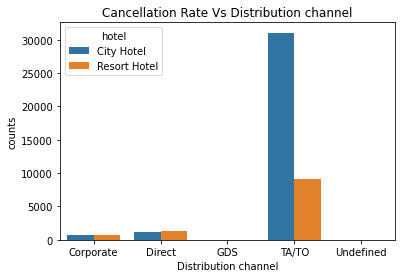

In [102]:
#Which distribution channel has the highest cancellation rate

canceled_df=df[df['is_canceled']==1] # 1= canceled

#group by distribution channel
canceled_df=canceled_df.groupby(['distribution_channel','hotel']).size().reset_index().rename(columns={0:'Counts'})
# canceled_df['Percentage']=canceled_df['Counts']*100/df1[df1['is_canceled']==1][0]
canceled_df

#set plot size and plot barchart 
plt.figure(figsize=(6,4))
sns.barplot(x='distribution_channel',y='Counts',hue="hotel",data=canceled_df)

# set labels
plt.xlabel('Distribution channel')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Distribution channel')



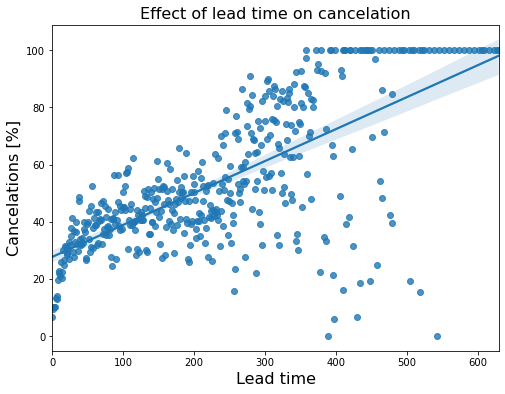

In [103]:
#Effect of lead_time on cancellation using scatter plot


# group data for lead_time:
lead_cancel_data = df.groupby("lead_time")["is_canceled"].describe()
# use only lead_times wih more than 10 bookings for graph:
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

#show figure:
plt.figure(figsize=(8, 6))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
# plt.xlim(0,365)
plt.show()

#Bookings made few days before are rarely canceled, whereas bookings made one year in advance are canceled very often

Text(0.5, 1.0, 'Correlation Matrix of the Hotel Booking')

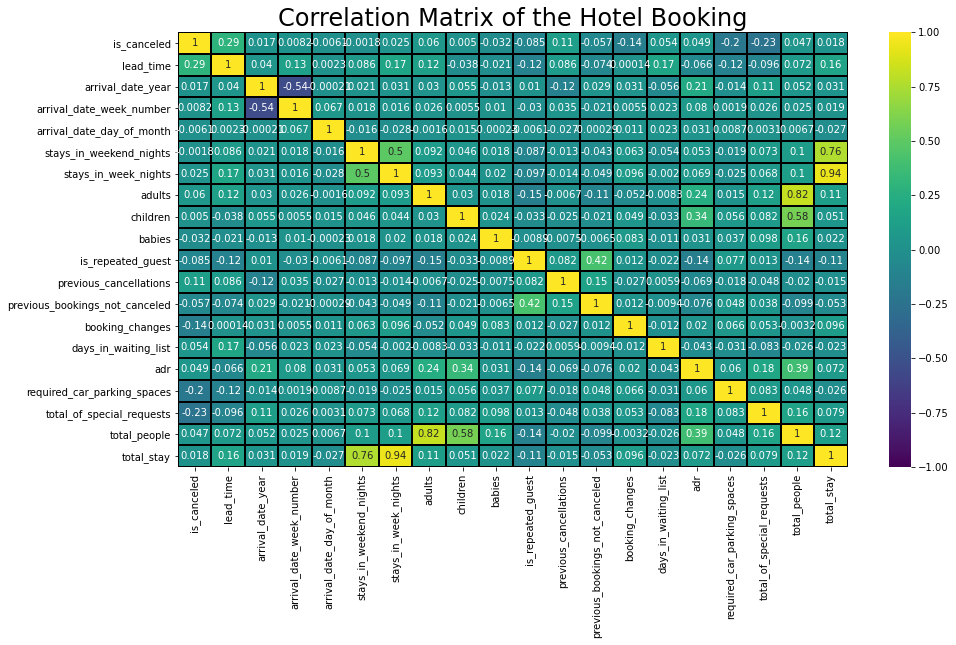

In [104]:
hotel_booking_df = df.copy()
plt.figure(figsize=(15, 8))
correlation = sns.heatmap(hotel_booking_df.corr(), vmin=-1, vmax=1, annot=True, linewidths=1, linecolor='black', cmap = "viridis")
correlation.set_title('Correlation Matrix of the Hotel Booking', fontdict={'fontsize': 24})

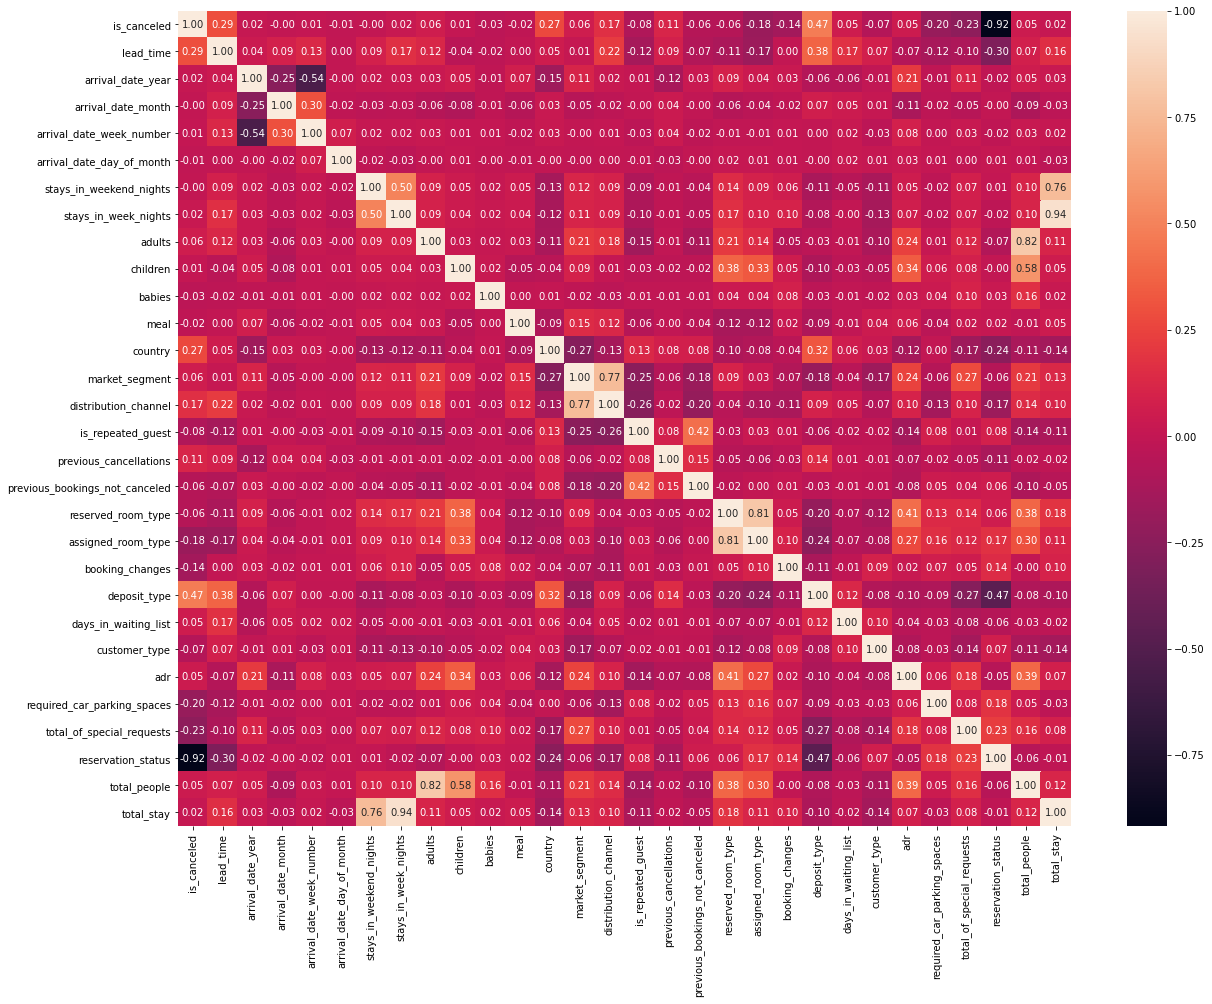

In [105]:
#Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form
df_le = df.copy()
le = LabelEncoder()
categoricals = [
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'customer_type',
    'reservation_status',
]
for col in categoricals:
    df_le[col] = le.fit_transform(df_le[col])
    
plt.figure(figsize=(20, 15))
sns.heatmap(df_le.corr(), annot=True, fmt='.2f');


In [106]:
df_le.corr()['is_canceled'].abs().sort_values(ascending=False)[1:]

reservation_status                0.917194
deposit_type                      0.468621
lead_time                         0.293140
country                           0.267491
total_of_special_requests         0.234658
required_car_parking_spaces       0.195499
assigned_room_type                0.176009
distribution_channel              0.167588
booking_changes                   0.144383
previous_cancellations            0.110134
is_repeated_guest                 0.084768
customer_type                     0.068129
reserved_room_type                0.061280
adults                            0.060017
market_segment                    0.059333
previous_bookings_not_canceled    0.057350
days_in_waiting_list              0.054187
adr                               0.048695
total_people                      0.046522
babies                            0.032491
stays_in_week_nights              0.024786
total_stay                        0.017807
meal                              0.017675
arrival_dat

# Encoding categorical variables

In [107]:
lb = LabelEncoder()
var = ['hotel', 'customer_type', 'market_segment', 'distribution_channel', 'reservation_status_date',
      'deposit_type','reserved_room_type']
for item in var:
    df_le[item] = lb.fit_transform(df_le[item])

In [108]:
data = pd.get_dummies(df_le, columns=['hotel', 'customer_type', 'market_segment', 'distribution_channel'])

In [109]:
df_le

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay
0,1,0,342,2015,5,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,0,2,0.00,0,0,1,121,2.0,0
1,1,0,737,2015,5,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,0,2,0.00,0,0,1,121,2.0,0
2,1,0,7,2015,5,27,1,0,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,0,2,75.00,0,0,1,122,1.0,1
3,1,0,13,2015,5,27,1,0,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,0,2,75.00,0,0,1,122,1.0,1
4,1,0,14,2015,5,27,1,0,2,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,0,2,98.00,0,1,1,123,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,1,35,30,2,5,2,0.0,0,0,15,5,3,0,0,0,0,0,0,0,0,2,96.14,0,0,1,919,2.0,7
119386,0,0,102,2017,1,35,31,2,5,3,0.0,0,0,56,6,3,0,0,0,4,4,0,0,0,2,225.43,0,2,1,920,3.0,7
119387,0,0,34,2017,1,35,31,2,5,2,0.0,0,0,43,6,3,0,0,0,3,3,0,0,0,2,157.71,0,4,1,920,2.0,7
119388,0,0,109,2017,1,35,31,2,5,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,0,2,104.40,0,0,1,920,2.0,7


In [110]:
# since we have columns that that's have almost similar value like children babies, now is combined into total_people
# stays in weekend nights and stays in week nights now combined into total stays. So, we will be dropping both columns.
# Furthermore, in the above matrix, there appears to be a negative high correlation between reservation_status 
# and is_canceled features. 
# also dropping the reservation_status_date column because it is related to the reservation_status column.

df_le = df_le.drop(columns = ['stays_in_weekend_nights', 'stays_in_week_nights', 'babies', 'children',
                              'days_in_waiting_list',  'arrival_date_year', 'assigned_room_type',
                              'days_in_waiting_list','meal','reserved_room_type',
                              'arrival_date_year', 'reservation_status' ,'reservation_status_date' ])
df_le = df_le.reset_index(drop = True)
df_le.head()


,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_people,total_stay
0,1,0,342,5,27,1,2,135,3,1,0,0,0,3,0,2,0.0,0,0,2.0,0
1,1,0,737,5,27,1,2,135,3,1,0,0,0,4,0,2,0.0,0,0,2.0,0
2,1,0,7,5,27,1,1,59,3,1,0,0,0,0,0,2,75.0,0,0,1.0,1
3,1,0,13,5,27,1,1,59,2,0,0,0,0,0,0,2,75.0,0,0,1.0,1
4,1,0,14,5,27,1,2,59,6,3,0,0,0,0,0,2,98.0,0,1,2.0,2


In [112]:
clean_data_scal = df_le.drop('is_canceled', axis = 1)

robust = RobustScaler()
robust.fit(clean_data_scal)
scaled_df = robust.transform(clean_data_scal)
scaled_df = pd.DataFrame(scaled_df, columns = clean_data_scal.columns)
scaled_df.head()

,hotel,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_people,total_stay
0,1.0,1.922535,-0.166667,-0.045455,-1.0,0.0,0.683544,-1.0,-2.0,0.0,0.0,0.0,3.0,0.0,0.0,-1.667695,0.0,0.0,0.0,-1.5
1,1.0,4.704225,-0.166667,-0.045455,-1.0,0.0,0.683544,-1.0,-2.0,0.0,0.0,0.0,4.0,0.0,0.0,-1.667695,0.0,0.0,0.0,-1.5
2,1.0,-0.436620,-0.166667,-0.045455,-1.0,-1.0,-0.278481,-1.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.345177,0.0,0.0,-1.0,-1.0
3,1.0,-0.394366,-0.166667,-0.045455,-1.0,-1.0,-0.278481,-1.5,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.345177,0.0,0.0,-1.0,-1.0
4,1.0,-0.387324,-0.166667,-0.045455,-1.0,0.0,-0.278481,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060395,0.0,1.0,0.0,-0.5


In [113]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119388 entries, 0 to 119387
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119388 non-null  float64
 1   lead_time                       119388 non-null  float64
 2   arrival_date_month              119388 non-null  float64
 3   arrival_date_week_number        119388 non-null  float64
 4   arrival_date_day_of_month       119388 non-null  float64
 5   adults                          119388 non-null  float64
 6   country                         119388 non-null  float64
 7   market_segment                  119388 non-null  float64
 8   distribution_channel            119388 non-null  float64
 9   is_repeated_guest               119388 non-null  float64
 10  previous_cancellations          119388 non-null  float64
 11  previous_bookings_not_canceled  119388 non-null  float64
 12  booking_changes 

In [114]:
scaled_df['is_canceled'] = df_le['is_canceled']

In [115]:
scaled_df.isna().sum()

hotel                             0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
adults                            0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
total_people                      0
total_stay                        0
is_canceled                       0
dtype: int64

In [116]:
# Separate features and predicted value
x_feat = scaled_df.drop('is_canceled', axis = 1)
y_feat = scaled_df['is_canceled']

[0.01524793 0.13794892 0.03514585 0.05910397 0.07067619 0.01353106
 0.12503737 0.05563193 0.01775188 0.00523049 0.02450703 0.0023263
 0.02342737 0.13203541 0.0313052  0.08788761 0.02459407 0.06044288
 0.01837892 0.05978961]


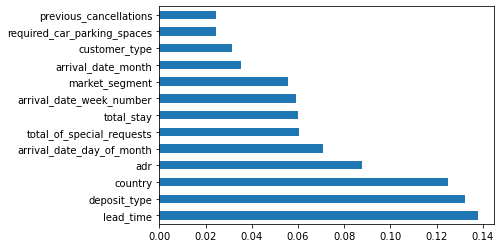

In [117]:
# perform feature selection using Feature Importance
model = ExtraTreesClassifier()
model.fit(x_feat, y_feat)

print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index = x_feat.columns)
feat_importances.nlargest(13).plot.barh()
plt.show()

In [ ]:
# X.shape()

In [160]:
# Perform feature selection based on feature importance above

X = scaled_df[['country', 
        'deposit_type', 
        'lead_time', 
        'total_of_special_requests', 
        'adr', 'deposit_type',
        'market_segment', 'total_stay',
        'arrival_date_day_of_month', 
        'arrival_date_week_number', 
     'arrival_date_month','booking_changes','previous_cancellations',
               'customer_type'
       ]]

y = scaled_df['is_canceled'] 

In [161]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119388 entries, 0 to 119387
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   country                    119388 non-null  float64
 1   deposit_type               119388 non-null  float64
 2   lead_time                  119388 non-null  float64
 3   total_of_special_requests  119388 non-null  float64
 4   adr                        119388 non-null  float64
 5   deposit_type               119388 non-null  float64
 6   market_segment             119388 non-null  float64
 7   total_stay                 119388 non-null  float64
 8   arrival_date_day_of_month  119388 non-null  float64
 9   arrival_date_week_number   119388 non-null  float64
 10  arrival_date_month         119388 non-null  float64
 11  booking_changes            119388 non-null  float64
 12  previous_cancellations     119388 non-null  float64
 13  customer_type              11

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [170]:
X_train.shape

(83571, 14)

In [123]:
num_columns = df_le.select_dtypes(include='number')
num_columns

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_people,total_stay
0,1,0,342,5,27,1,2,135,3,1,0,0,0,3,0,2,0.00,0,0,2.0,0
1,1,0,737,5,27,1,2,135,3,1,0,0,0,4,0,2,0.00,0,0,2.0,0
2,1,0,7,5,27,1,1,59,3,1,0,0,0,0,0,2,75.00,0,0,1.0,1
3,1,0,13,5,27,1,1,59,2,0,0,0,0,0,0,2,75.00,0,0,1.0,1
4,1,0,14,5,27,1,2,59,6,3,0,0,0,0,0,2,98.00,0,1,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,0,0,23,1,35,30,2,15,5,3,0,0,0,0,0,2,96.14,0,0,2.0,7
119384,0,0,102,1,35,31,3,56,6,3,0,0,0,0,0,2,225.43,0,2,3.0,7
119385,0,0,34,1,35,31,2,43,6,3,0,0,0,0,0,2,157.71,0,4,2.0,7
119386,0,0,109,1,35,31,2,59,6,3,0,0,0,0,0,2,104.40,0,0,2.0,7


# KNN

In [124]:
pipe_KNN = Pipeline([
    ('algo', KNeighborsClassifier())
])

In [125]:
param_KNN = {
    'algo__n_neighbors': [5, 10, 15, 20, 30, 40],
    'algo__weights':['uniform', 'distance'],
    'algo__p':[2,1]
}

model_KNN = GridSearchCV(estimator=pipe_KNN, param_grid=param_KNN, cv = 3, n_jobs = -1, verbose = 1)
model_KNN.fit(X_train, y_train)

#Grid Search uses a different combination of all the specified hyperparameters 
#and their values and calculates the performance for each combination and selects the best value for the hyperparameters.

#After tuning the model,using the 'fit' method trains the algorithm on the training data

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  6.7min finished


GridSearchCV(cv=3, estimator=Pipeline(steps=[('algo', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'algo__n_neighbors': [5, 10, 15, 20, 30, 40],
                         'algo__p': [2, 1],
                         'algo__weights': ['uniform', 'distance']},
             verbose=1)

In [126]:
#best_estimator_estimator - Estimator that was chosen by the search, i.e. estimator which gave
#highest score (or smallest loss if specified) on the left out data. 
KNN_tuned = model_KNN.best_estimator_
KNN_tuned_train = model_KNN.best_score_
y_pred_KNN_tuned = KNN_tuned.predict(X_test) 

In [127]:
pipe_KNN.get_params()

{'memory': None,
 'steps': [('algo', KNeighborsClassifier())],
 'verbose': False,
 'algo': KNeighborsClassifier(),
 'algo__algorithm': 'auto',
 'algo__leaf_size': 30,
 'algo__metric': 'minkowski',
 'algo__metric_params': None,
 'algo__n_jobs': None,
 'algo__n_neighbors': 5,
 'algo__p': 2,
 'algo__weights': 'uniform'}

In [128]:
recall_KNN_tuned = recall_score(y_test, y_pred_KNN_tuned)
acc_KNN_tuned = accuracy_score(y_test, y_pred_KNN_tuned)
precision_KNN_tuned = precision_score(y_test, y_pred_KNN_tuned)
f1_KNN_tuned = f1_score(y_test, y_pred_KNN_tuned)
acc_KNN_tuned_train = KNN_tuned_train

print(f"Training Accuracy : {acc_KNN_tuned_train}")
print(f"Testing Accuracy : {acc_KNN_tuned}")


# KNN has a better accuracy score compared to Decision Tree algorithm 


Training Accuracy : 0.8505342762441517
Testing Accuracy : 0.8550967417706675


In [129]:
print(classification_report(y_test, y_pred_KNN_tuned))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     22455
           1       0.86      0.72      0.79     13362

    accuracy                           0.86     35817
   macro avg       0.86      0.83      0.84     35817
weighted avg       0.86      0.86      0.85     35817



# DECISION TREE

In [131]:
pipe_DT = Pipeline([
    ("algo", DecisionTreeClassifier())
])

In [132]:
param_DT = {
    'algo__min_samples_split': [2,1,3,4,6,8,10,],
    'algo__max_depth': [None,1,2,4,8,10,12,14,18, 20],
    'algo__min_samples_leaf':[1,2,4,5,8]
}

model_DT = GridSearchCV(estimator=pipe_DT, param_grid=param_DT, cv = 3, n_jobs = -1, verbose = 1, scoring='accuracy')
model_DT.fit(X_train, y_train)


#Grid Search uses a different combination of all the specified hyperparameters 
#and their values and calculates the performance for each combination and selects the best value for the hyperparameters.

#After tuning the model,using the 'fit' method trains the algorithm on the training data


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   40.2s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('algo', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'algo__max_depth': [None, 1, 2, 4, 8, 10, 12, 14, 18,
                                             20],
                         'algo__min_samples_leaf': [1, 2, 4, 5, 8],
                         'algo__min_samples_split': [2, 1, 3, 4, 6, 8, 10]},
             scoring='accuracy', verbose=1)

In [134]:
#best_estimator_estimator - Estimator that was chosen by the search, i.e. estimator which gave
#highest score (or smallest loss if specified) on the left out data. 

DT_tuned = model_DT.best_estimator_
DT_tuned_train = model_DT.best_score_
y_pred_DT_tuned = DT_tuned.predict(X_test) 

In [135]:
recall_DT_tuned = recall_score(y_test, y_pred_DT_tuned)
acc_DT_tuned = accuracy_score(y_test, y_pred_DT_tuned)
precision_DT_tuned = precision_score(y_test, y_pred_DT_tuned)
f1_DT_tuned = f1_score(y_test, y_pred_DT_tuned)
acc_DT_tuned_train = DT_tuned_train

print(f"Training Accuracy : {acc_DT_tuned_train}")
print(f"Testing Accuracy : {acc_DT_tuned}")

Training Accuracy : 0.8330162376901078
Testing Accuracy : 0.8345478404109781


In [136]:
print(classification_report(y_test, y_pred_DT_tuned))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     22455
           1       0.80      0.74      0.77     13362

    accuracy                           0.83     35817
   macro avg       0.83      0.82      0.82     35817
weighted avg       0.83      0.83      0.83     35817



# Decision Tree using SMOTE 

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, auc, roc_curve, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier

import joblib
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [173]:
sm = SMOTE(random_state = 42)
X_train=np.array(X_train)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [176]:
sm = SMOTE(random_state = 42)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [178]:
# X_train setelah oversampling dengan SMOTE
X_train =  pd.DataFrame(X_train, columns = X.columns)

In [152]:
df_sm = pd.DataFrame(X_sm, columns = X_train.columns)
df_sm

,country,deposit_type,lead_time,total_of_special_requests,adr,deposit_type,market_segment,total_stay,arrival_date_day_of_month,arrival_date_week_number,arrival_date_month,booking_changes,previous_cancellations,customer_type
0,-0.316456,0.0,0.373239,2.0,-0.349586,0.0,0.5,0.5,0.733333,1.136364,-0.666667,3.0,0.0,0.0
1,0.683544,1.0,-0.330986,0.0,-0.574414,1.0,-0.5,-0.5,0.400000,0.090909,-0.166667,0.0,0.0,1.0
2,1.113924,0.0,0.612676,0.0,0.638776,0.0,0.5,0.0,-0.266667,-0.409091,0.333333,0.0,0.0,0.0
3,0.658228,0.0,-0.049296,2.0,-0.803650,0.0,0.5,2.5,-0.733333,-0.590909,-1.000000,0.0,0.0,0.0
4,-0.063291,0.0,-0.190141,1.0,0.254364,0.0,0.5,-1.0,0.466667,0.500000,0.833333,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105415,0.683544,0.0,0.248537,1.0,0.044010,0.0,0.0,0.0,0.711869,-0.650998,0.166667,0.0,0.0,1.0
105416,0.683544,0.0,0.471831,0.0,-0.627163,0.0,-0.5,0.0,0.066667,0.045455,-0.166667,0.0,1.0,0.0
105417,0.683544,1.0,0.119718,0.0,-0.856551,1.0,-0.5,0.0,-0.466667,-0.818182,0.166667,0.0,0.0,0.0
105418,0.683544,0.0,-0.234994,0.0,1.448817,0.0,0.5,2.0,-0.205485,-0.293585,0.162096,0.0,0.0,0.0


In [153]:
# y_train after oversampling with SMOTE

y_sm = pd.DataFrame(y_sm)
y_sm['is_canceled'] = y_sm

In [154]:
y_sm

,is_canceled
0,1
1,1
2,1
3,0
4,1
...,...
105415,1
105416,1
105417,1
105418,1


In [155]:
# X_train after oversampling with random oversampling

df_randov = pd.DataFrame(X_randov, columns = X_train.columns)
df_randov

,country,deposit_type,lead_time,total_of_special_requests,adr,deposit_type,market_segment,total_stay,arrival_date_day_of_month,arrival_date_week_number,arrival_date_month,booking_changes,previous_cancellations,customer_type
0,-0.316456,0.0,0.373239,2.0,-0.349586,0.0,0.5,0.5,0.733333,1.136364,-0.666667,3.0,0.0,0.0
1,0.683544,1.0,-0.330986,0.0,-0.574414,1.0,-0.5,-0.5,0.400000,0.090909,-0.166667,0.0,0.0,1.0
2,1.113924,0.0,0.612676,0.0,0.638776,0.0,0.5,0.0,-0.266667,-0.409091,0.333333,0.0,0.0,0.0
3,0.658228,0.0,-0.049296,2.0,-0.803650,0.0,0.5,2.5,-0.733333,-0.590909,-1.000000,0.0,0.0,0.0
4,-0.063291,0.0,-0.190141,1.0,0.254364,0.0,0.5,-1.0,0.466667,0.500000,0.833333,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105415,0.683544,0.0,0.218310,2.0,-0.991977,0.0,-1.0,0.0,0.266667,-0.909091,-0.500000,0.0,0.0,0.0
105416,0.683544,1.0,0.197183,0.0,0.801005,1.0,-0.5,0.5,-0.733333,0.590909,0.666667,0.0,0.0,0.0
105417,-0.949367,0.0,-0.084507,0.0,0.411303,0.0,0.5,0.0,-0.533333,-0.181818,0.000000,0.0,0.0,0.0
105418,-0.379747,0.0,-0.330986,0.0,1.841386,0.0,0.5,1.0,0.866667,1.136364,-0.666667,8.0,0.0,0.0


In [156]:
# y_train after oversampling with random oversampling

y_randov = pd.DataFrame(y_randov)
y_randov['is_canceled'] = y_randov

In [157]:
y_randov

,is_canceled
0,1
1,1
2,1
3,0
4,1
...,...
105415,1
105416,1
105417,1
105418,1


In [135]:
# Create a Gradient Boost model with SMOTE

dt_model_sm =model_DT.fit(df_sm, y_sm)

Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   54.7s finished


In [136]:
# Create a Gradient Boost model with Random Ovsampling
dt_model_rand = model_DT.fit(df_randov, y_randov)

Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 474 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   46.6s finished


In [137]:
#Predict with random oversampling

y_pred_rand = dt_model_rand.predict(X_test)
proba_rand = dt_model_rand.predict_proba(X_test)

In [138]:
# Predict with SMOTE
y_pred_dtsm = dt_model_sm.predict(X_test)
proba_dtsm = dt_model_sm.predict_proba(X_test)

In [139]:
# Cross Validation score (SMOTE)

cross_val_score(dt_model_sm, X_test, y_test, cv = 10).mean()

Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:    9.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:    9.4s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:   10.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   11.0s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:   11.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   11.3s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:   11.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   11.1s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   11.0s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   10.9s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:   11.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   11.3s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:   10.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   10.9s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   10.8s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:   11.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   11.4s finished


0.8251389904313837

In [140]:
# Cross Validation score (Random ovsampling)

cross_val_score(dt_model_rand, X_test, y_test, cv = 10).mean()

Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 568 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:    6.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:    7.1s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:    9.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:    9.6s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:   11.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   11.8s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:   11.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   11.5s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 392 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:   10.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   10.9s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:   10.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   10.7s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:   10.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   11.3s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:   11.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   12.1s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:   11.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   11.5s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 392 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:   11.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   11.3s finished


0.8253902389168217

In [141]:
# Cross Validation score (Data Awal)

cross_val_score(model_DT, X_test, y_test, cv = 10).mean()

Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:    7.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:    7.2s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 568 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   10.0s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:   10.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   11.1s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   10.9s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:   10.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   10.9s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:   10.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   11.2s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:   11.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   11.7s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:   11.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   11.4s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   12.0s finished


Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 1027 out of 1050 | elapsed:   11.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   11.4s finished


0.8252227503211549

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     22654
           1       0.76      0.77      0.76     13163

    accuracy                           0.83     35817
   macro avg       0.81      0.81      0.81     35817
weighted avg       0.83      0.83      0.83     35817

[[19383  3271]
 [ 2992 10171]]


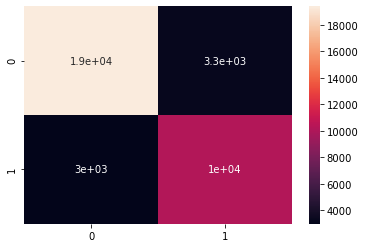

In [142]:
#Classification report of Decision Tree by using SMOTE

print(classification_report(y_test, y_pred_dtsm))
print(confusion_matrix(y_test, y_pred_dtsm))
confus_gbsm = confusion_matrix(y_test, y_pred_dtsm)
sns.heatmap(confus_gbsm, annot = True)

# KNN uisng SMOTE

In [ ]:
# Create a Gradient Boost model with SMOTE

KNN_model_sm =model_KNN.fit(df_sm, y_sm)

In [152]:
# Create a Gradient Boost model with Random Ovsampling
knn_model_rand = model_KNN.fit(df_randov, y_randov)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 10.3min finished


In [155]:
# Predict with SMOTE
y_pred_knnsm = KNN_model_sm.predict(X_test)
proba_knnsm = KNN_model_sm.predict_proba(X_test)

In [156]:
# Cross Validation score (SMOTE)

cross_val_score(KNN_model_sm, X_test, y_test, cv = 10).mean()

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.5min finished


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.5min finished


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.5min finished


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.5min finished


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.5min finished


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.6min finished


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.5min finished


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.5min finished


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.4min finished


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.4min finished


0.8409136033576303

In [ ]:
# Cross Validation score (Data Awal)

cross_val_score(model_KNN, X_test, y_test, cv = 10).mean()

              precision    recall  f1-score   support

           0       0.89      0.86      0.87     22654
           1       0.77      0.82      0.79     13163

    accuracy                           0.84     35817
   macro avg       0.83      0.84      0.83     35817
weighted avg       0.85      0.84      0.84     35817

[[19488  3166]
 [ 2420 10743]]


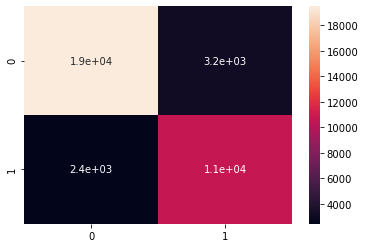

In [159]:
#Classification report of KNN by using SMOTE

print(classification_report(y_test, y_pred_knnsm))
print(confusion_matrix(y_test, y_pred_knnsm))
confus_knnsm = confusion_matrix(y_test, y_pred_knnsm)
sns.heatmap(confus_knnsm, annot = True)

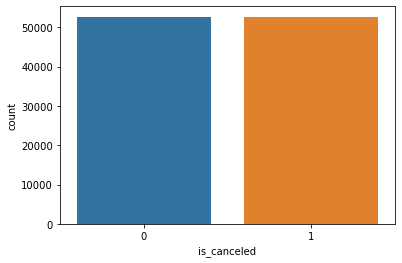

In [179]:
#SMOTE TECHNIQUE
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y_sm, data = df_sm)
 
# Show the plot
plt.show()

# ROC CURVE

In [81]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [90]:
knn_parameters = {'n_neighbors': range(1, 11), 
                  'leaf_size': range(30, 35)}

knn_params = {
            'estimator': KNeighborsClassifier(),
            'param_distributions': knn_parameters,
            'cv': 5,
            'n_iter': 15,
            'n_jobs': -1,
            'scoring': 'roc_auc',
            }

knn_cv = RandomizedSearchCV(**knn_params)

In [91]:
knn_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'leaf_size': range(30, 35),
                                        'n_neighbors': range(1, 11)},
                   scoring='roc_auc')

In [93]:
knn_cv.best_params_
# knn_best_param = {'n_neighbors': 10}

{'n_neighbors': 10, 'leaf_size': 31}

In [94]:
knn_model = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
proba_kn = knn_model.predict_proba(X_test)

In [95]:
accuracy_score(y_test, y_pred_knn)

0.8262556886394729

In [96]:
def knn_curve():    
    fpr_kn, tpr_kn, thres_kn = roc_curve(y_test, proba_kn[:,1])
    roc_auc_kn = auc(fpr_kn, tpr_kn)

    plt.subplot(154)
    plt.title('ROC AUC KNN')
    plt.plot(fpr_kn, tpr_kn, 'blue', label='AUC KNN = {}'.format(round(roc_auc_kn,4)))
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.fill_between(fpr_kn,tpr_kn, 0, facecolor='azure', alpha=1)
    plt.legend(loc = 'lower right')

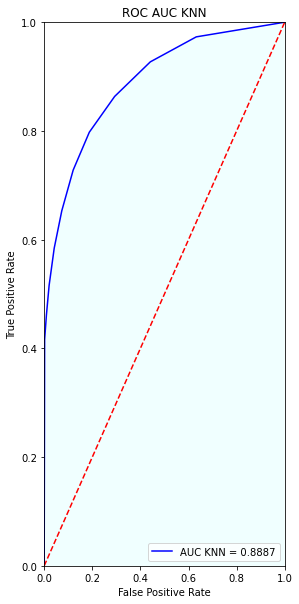

In [97]:
plt.figure(figsize = (25, 10))
knn_curve()